<a href="https://colab.research.google.com/github/Ziad-o-Yusef/-Medical-Cost-Personal/blob/main/13_Image_classification_with_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd 
import cv2
from google.colab import drive
drive.mount('/content/drive')
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle_MyAPI"
import tensorflow as tf
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/datasets/die9origephit/children-vs-adults-images


In [7]:
! kaggle datasets download -d die9origephit/children-vs-adults-images

 61% 17.0M/27.7M [00:00<00:00, 85.9MB/s]
100% 27.7M/27.7M [00:00<00:00, 112MB/s] 


In [ ]:
! unzip children-vs-adults-images.zip

In [14]:
dir = '/content/train'
dirs = os.listdir(dir)
imshow_dirs = []
for i in dirs : 
    step = os.listdir(dir+ '/'+ i)
    for x in range(10):
      imshow_dirs.append(dir+ '/' + i + '/' + step[x])
print(len(imshow_dirs))    

20


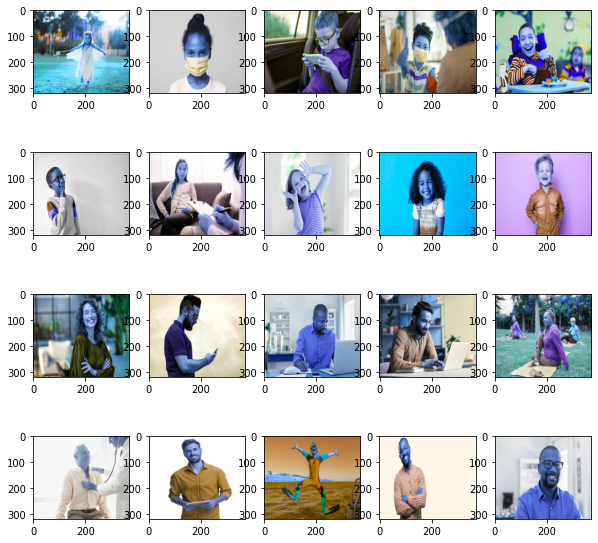

In [15]:
fig, ax = plt.subplots(4,5,figsize=(10,10))
for n in range(4):
    for m in range(5):
        path =imshow_dirs[m + 5*n]
        image = cv2.imread(str(path))
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [16]:
img = cv2.imread('/content/train/adults/100.jpg')
img.shape

(320, 370, 3)

In [54]:
train_path = '/content/train'
test_path = '/content/test'
train_generation = tf.keras.preprocessing.image.ImageDataGenerator(tf.keras.applications.densenet.preprocess_input(
    x, data_format=None
)).flow_from_directory(
      train_path,
      target_size=(224,224),
      batch_size=30,
      class_mode='categorical',
     
    )
test_generation = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
      test_path,
      target_size=(224,224),
      batch_size=30,
      class_mode='categorical',
      
    )

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [130]:
base_model = tf.keras.applications.DenseNet201(
    weights = "imagenet",
     include_top=False,
     input_shape=(224,224,3),
     )

In [131]:


base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 230, 230, 3)  0          ['input_10[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_12[0][0]']      
                                )                                                       

In [151]:
last_layer = base_model.get_layer('conv5_block20_concat')

In [152]:
last_output = last_layer.output
Model = tf.keras.layers.Flatten()(last_output)
Model = tf.keras.layers.Dense(60, activation='relu',kernel_initializer='he_uniform',)(Model)
Model = tf.keras.layers.BatchNormalization()(Model)
Model = tf.keras.layers.Dropout(0.5)(Model)
Model = tf.keras.layers.Dense(2, activation='softmax', name='softmax')(Model)
new_model = tf.keras.models.Model(inputs=base_model.input, outputs=Model)

In [153]:
new_model.summary()

In [154]:
new_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
new_model.fit_generator(train_generation,
                   validation_data=test_generation,  epochs=30, verbose=2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


23/23 - 29s - loss: 0.1057 - accuracy: 0.9603 - val_loss: 0.6410 - val_accuracy: 0.7917 - 29s/epoch - 1s/step
Epoch 2/30
23/23 - 11s - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.7751 - val_accuracy: 0.8083 - 11s/epoch - 491ms/step
Epoch 3/30
23/23 - 11s - loss: 0.0092 - accuracy: 0.9985 - val_loss: 0.6300 - val_accuracy: 0.8333 - 11s/epoch - 495ms/step
Epoch 4/30
23/23 - 11s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5198 - val_accuracy: 0.8750 - 11s/epoch - 499ms/step
Epoch 5/30
23/23 - 12s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4576 - val_accuracy: 0.8583 - 12s/epoch - 503ms/step
Epoch 6/30
23/23 - 12s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4467 - val_accuracy: 0.8500 - 12s/epoch - 506ms/step
Epoch 7/30
23/23 - 12s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.5171 - val_accuracy: 0.8500 - 12s/epoch - 509ms/step
Epoch 8/30
23/23 - 12s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5144 - val_accuracy: 0.8500 - 12s/epoch - 507ms/step
Epoch 9/30
23/23 - 12s